# Project - PART 1

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score,median_absolute_error

In [9]:
# Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import losses
from tensorflow.keras.losses import MAE,MSE
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD,Adam

<b>•DOMAIN: </b> Electronics and Telecommunication

<b>•CONTEXT: </b>A  communications  equipment  manufacturing  company  has  a  product  which  is  responsible  for  emitting  informative  signals.  Company  wants  to  build  a machine learning model which can help the company to predict the equipment’s signal quality using various parameters.

<b>•DATA DESCRIPTION:</b></br>
The data set contains information on various signal tests performed:</br>
1.<b>Parameters:</b> Various measurable signal parameters.</br>
2.<b>Signal_Quality:</b> Final signal strength or quality

<b>•PROJECT OBJECTIVE:</b> The need is to build a regressor which can use these parameters to determine the signal strength or quality [as number]

# Project-PART 2

In [10]:
# importing dataset
data = pd.read_csv('Signal.csv')
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Parameter 1,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Parameter 2,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Parameter 3,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Parameter 4,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Parameter 5,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Parameter 6,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Parameter 7,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Parameter 8,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
Parameter 9,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Parameter 10,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [13]:
data.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [14]:
data['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

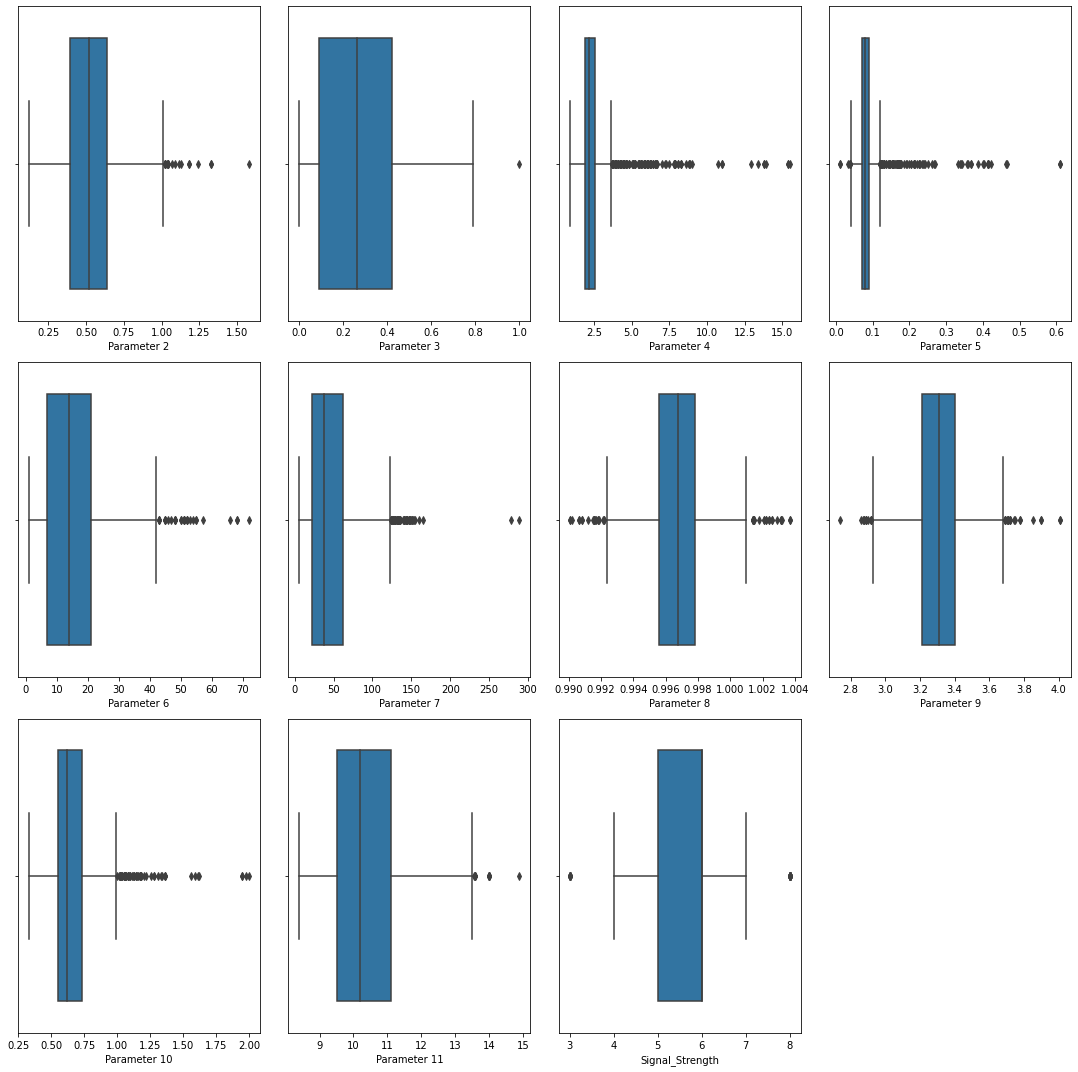

In [15]:
plt.figure(figsize = (15,15))
for i in range(1,12):
    plt.subplot(3,4,i)
    sns.boxplot(x = data.columns[i],data = data)
plt.tight_layout()
plt.show()

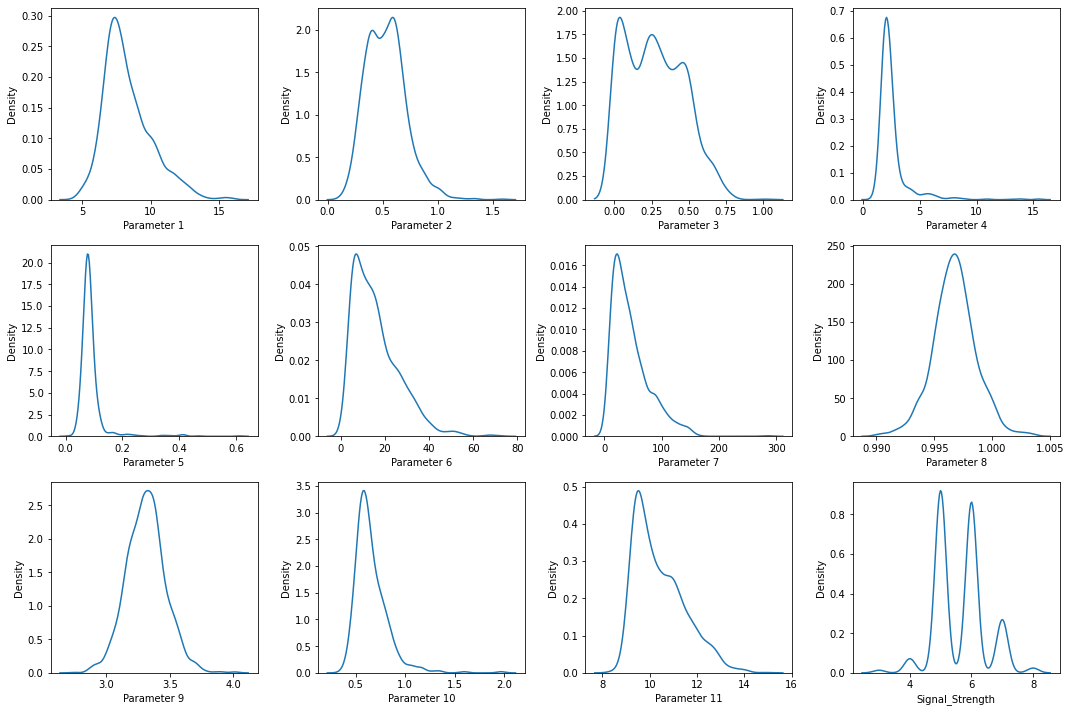

In [16]:
plt.figure(figsize = (15,10))
for i in range(0,12):
    #plt.figure(figsize = (15,15))
    plt.subplot(3,4,i+1)
    col = data.columns[i]
    sns.kdeplot(x = col,data = data)
plt.tight_layout()
plt.show()

### outcomes
* Parameter 4,5,6,7,10 are right skewed 
* Parameter 8,9 are symmetric 
* Parameter 2 has two picks
* Parameter 3 has 3 picks

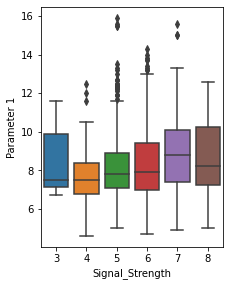

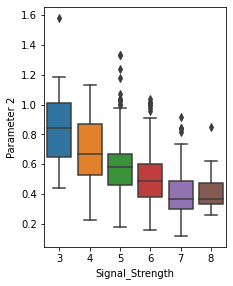

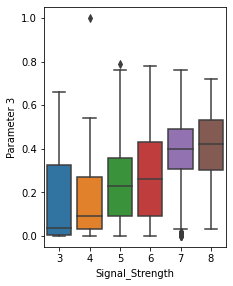

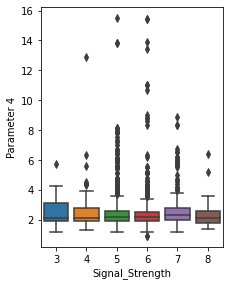

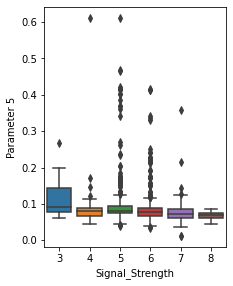

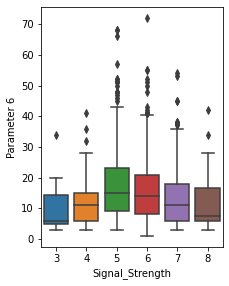

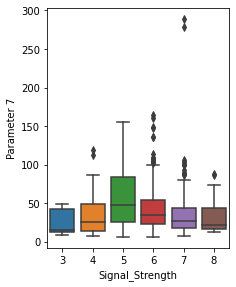

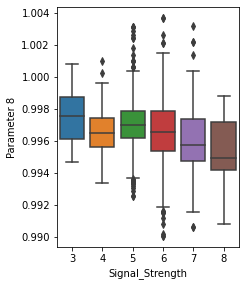

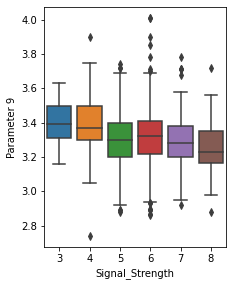

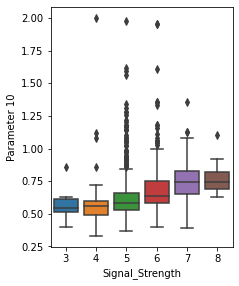

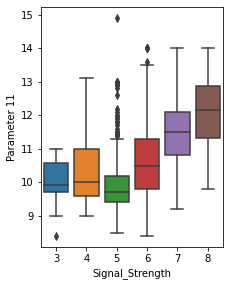

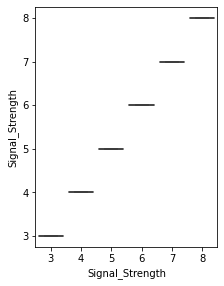

In [17]:
for i in range(0,12):
    plt.figure(figsize = (15,15))
    plt.subplot(3,4,i+1)
    col = data.columns[i]
    sns.boxplot(y = col,x = 'Signal_Strength',data = data)
    plt.show()

### Outcomes :
* Higher the Parameter 2 lower the signal strength so we can see some negitivce corelation here
* Higher the Parameter 3 higher the signal strength so we can see some positive corelation here
* Higher the Parameter 10 higher the signal strength so we can see some positive corelation here

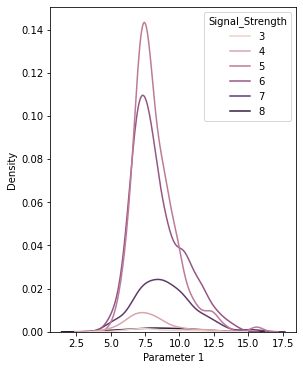

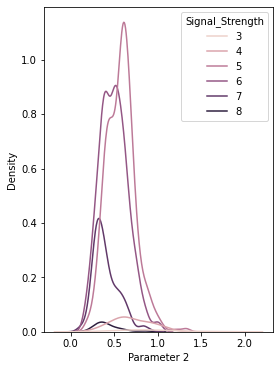

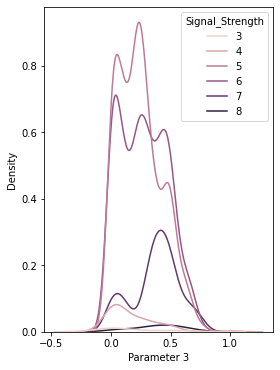

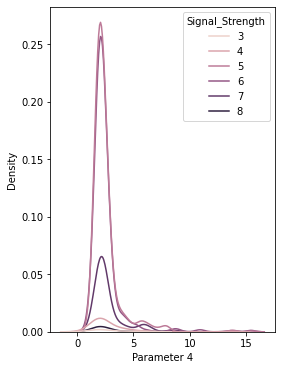

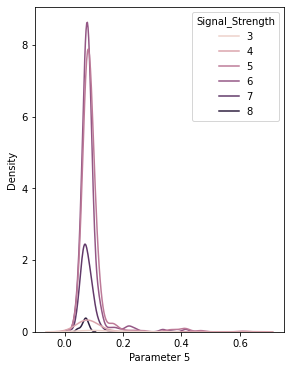

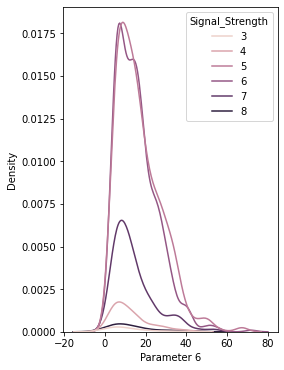

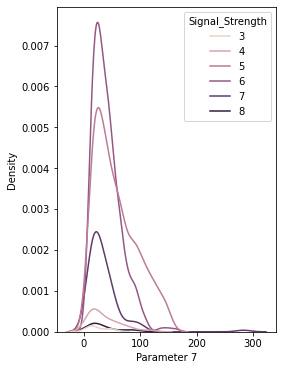

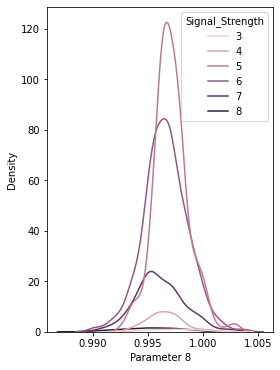

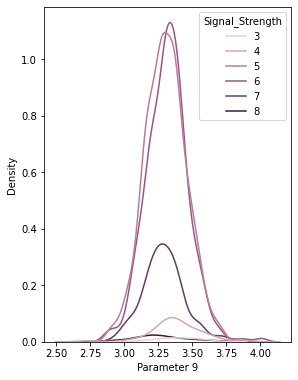

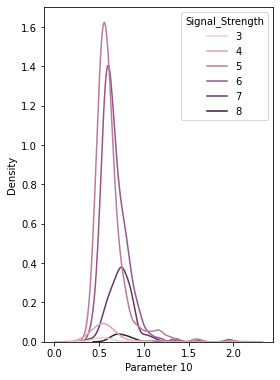

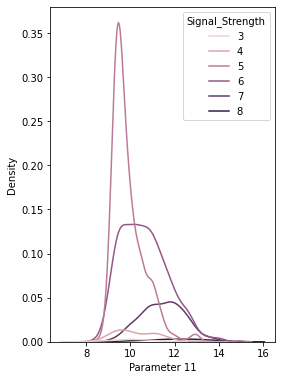

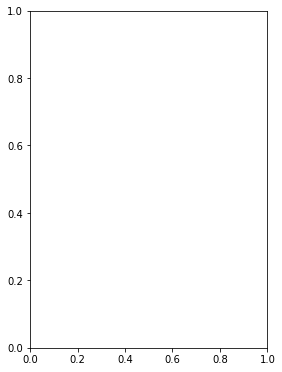

In [18]:
#plt.figure(figsize = (15,10))
for i in range(0,12):
    plt.figure(figsize = (15,15))
    plt.subplot(3,4,i+1)
    col = data.columns[i]
    if col != 'Signal_Strength':
        sns.kdeplot(x = col,hue = 'Signal_Strength',data = data)
    plt.tight_layout()
    plt.show()

* Parameter 4, 5 are more skwed twards right that means has more outlier or values on right side

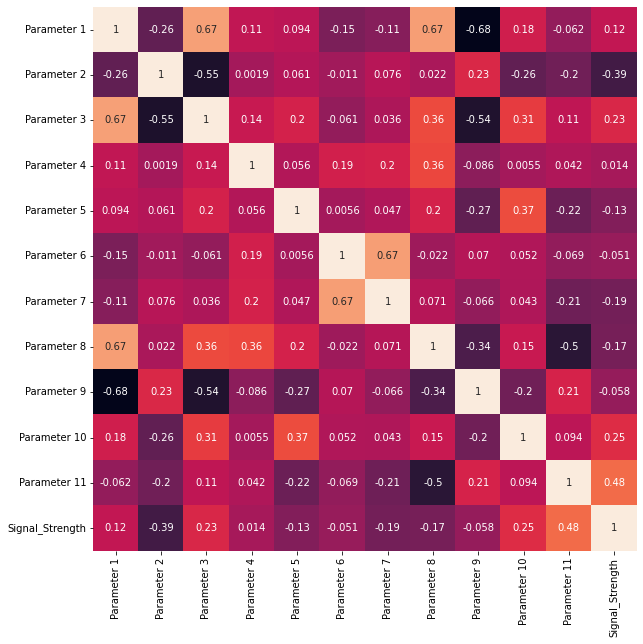

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot  = True,square = True,cbar = False)
plt.show()

<Figure size 720x720 with 0 Axes>

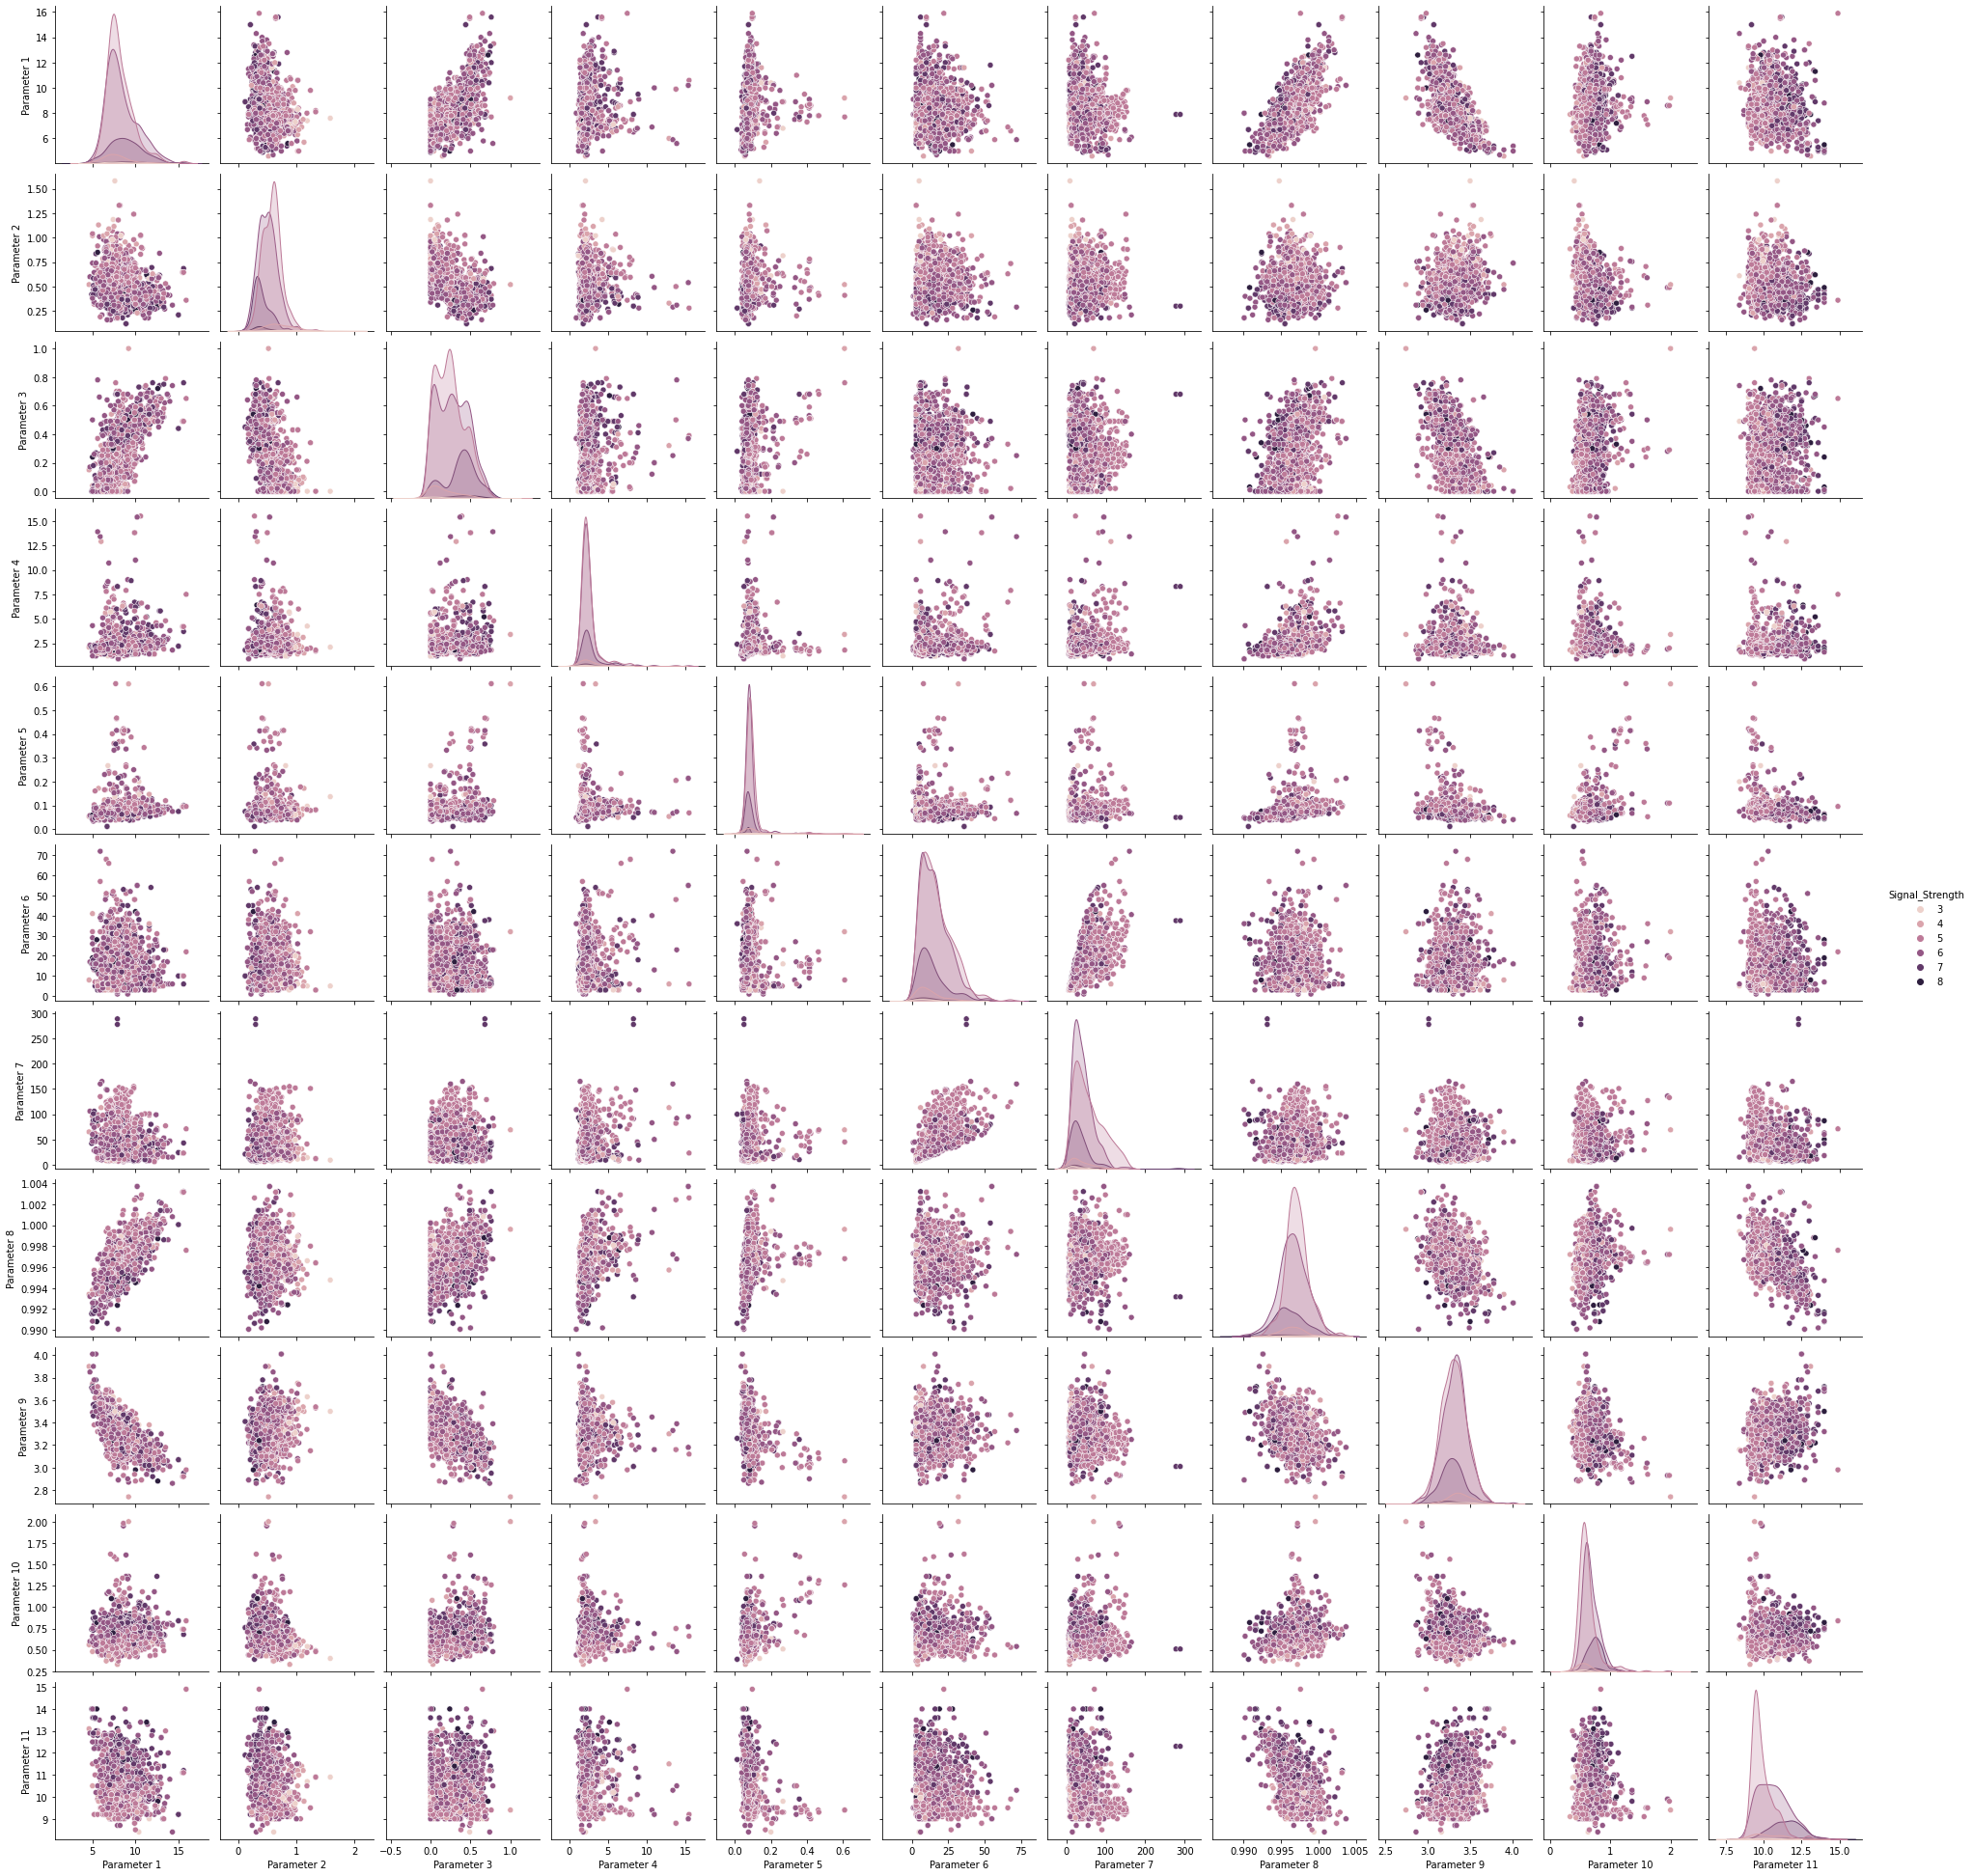

In [20]:
plt.figure(figsize = (10,10))
sns.pairplot(data,hue = 'Signal_Strength')
plt.show()

In [21]:
# Data Preprocessing
scaler = MinMaxScaler()
scaled_data  = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)
X = scaled_data.iloc[:,:-1]
y = scaled_data.iloc[:,-1]

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

In [22]:
X_train

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
952,0.318584,0.130137,0.40,0.089041,0.076795,0.070423,0.014134,0.388399,0.448819,0.209581,0.430769
563,0.265487,0.116438,0.49,0.123288,0.133556,0.338028,0.190813,0.516153,0.448819,0.167665,0.261538
150,0.238938,0.143836,0.47,0.082192,0.108514,0.056338,0.017668,0.420705,0.464567,0.119760,0.292308
202,0.194690,0.260274,0.11,0.041096,0.105175,0.211268,0.151943,0.395007,0.488189,0.275449,0.169231
638,0.274336,0.544521,0.12,0.089041,0.218698,0.084507,0.060071,0.464758,0.480315,0.191617,0.276923
...,...,...,...,...,...,...,...,...,...,...,...
1119,0.088496,0.369863,0.00,0.109589,0.090150,0.084507,0.031802,0.182819,0.614173,0.149701,0.692308
80,0.141593,0.226027,0.20,0.047945,0.095159,0.028169,0.031802,0.420705,0.527559,0.137725,0.123077
1474,0.469027,0.260274,0.50,0.883562,0.322204,0.661972,0.268551,0.906755,0.330709,0.251497,0.061538
1170,0.407080,0.164384,0.34,0.047945,0.083472,0.056338,0.021201,0.484581,0.362205,0.203593,0.323077


In [23]:
y_train

952     0.8
563     0.6
150     0.6
202     0.4
638     0.8
       ... 
1119    0.4
80      0.4
1474    0.4
1170    0.6
304     0.4
Name: Signal_Strength, Length: 1279, dtype: float64

In [24]:
# Buildinhg Machine learing models
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

# LR
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print("Linear regressiont train score = ",lr.score(X_train,y_train))

# lassso

lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
print("lasso train score = ",lasso.score(X_train,y_train))

#ridge

ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print("ridge train score = ",ridge.score(X_train,y_train))

#SVM

svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
print("svr train score = ",svr.score(X_train,y_train))

# knn

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("knn train score = ",knn.score(X_train,y_train))

#rf

rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print("random forest train score = ",rf.score(X_train,y_train))

# gb
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print("graidentBoost train score = ",gb.score(X_train,y_train))

Linear regressiont train score =  0.3545899646578492
lasso train score =  0.0
ridge train score =  0.35363576550654396
svr train score =  0.49344766682183205
knn train score =  0.5391473961939335
random forest train score =  0.9287290347298892
graidentBoost train score =  0.6446850184465465


In [25]:
# scores
print("Linear regressiont test score = ",lr.score(X_test,y_test))
print("lasso test score = ",lasso.score(X_test,y_test))
print("ridge test score = ",ridge.score(X_test,y_test))
print("svr test score = ",svr.score(X_test,y_test))
print("knn test score = ",knn.score(X_test,y_test))
print("random forest test score = ",rf.score(X_test,y_test))
print("graidentBoost test score = ",gb.score(X_test,y_test))

Linear regressiont test score =  0.3760043834196448
lasso test score =  -5.5170444847929545e-05
ridge test score =  0.3764629324113328
svr test score =  0.4117812168037157
knn test score =  0.30184635873842247
random forest test score =  0.5025466432592773
graidentBoost test score =  0.41298682061231873


In [26]:
# scores
print("Linear regressiont test score = ",mean_squared_error(y_test,lr_pred))
print("lasso test score = ",mean_squared_error(y_test,lasso_pred))
print("ridge test score = ",mean_squared_error(y_test,ridge_pred))
print("svr test score = ",mean_squared_error(y_test,svr_pred))
print("knn test score = ",mean_squared_error(y_test,knn_pred))
print("random forest test score = ",mean_squared_error(y_test,rf_pred))
print("graidentBoost test score = ",mean_squared_error(y_test,gb_pred))

Linear regressiont test score =  0.016105911859829524
lasso test score =  0.025812361500903835
ridge test score =  0.01609407628046438
svr test score =  0.015182478249405357
knn test score =  0.018020000000000015
random forest test score =  0.012839737500000007
graidentBoost test score =  0.015151360484851741


In [27]:
# building Ann 
model_1 = Sequential([
    Dense(100,activation = 'relu'),
    Dense(50,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

#2.compile
model_1.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(),metrics = ['mae'])

#model fitting
model_1.fit(X_train,y_train,epochs = 100)

Epoch 1/100
40/40 [==============================] - 2s 3ms/step - loss: 0.2139 - mae: 0.2139
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1128 - mae: 0.1128
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1064 - mae: 0.1064
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1046 - mae: 0.1046
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1018 - mae: 0.1018
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1012 - mae: 0.1012
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0995 - mae: 0.0995
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0990 - mae: 0.0990
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0982 - mae: 0.0982
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0968 - mae: 0.0968
Epoch 11/100
40/40 [==============================] - 0s 4m

In [28]:
#check the results 
model_1.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0912 - mae: 0.0912


[0.0912013053894043, 0.0912013053894043]

In [29]:
y_pred1 = model_1.predict(X_test)

In [30]:
y_pred1[1]-y_test[:1]

1515   -0.134352
Name: Signal_Strength, dtype: float64

In [31]:
!pip install keras_tuner

     |████████████████████████████████| 98 kB 3.7 MB/s 


In [32]:
import keras_tuner as kt
from keras_tuner import HyperModel


class ANNHyperModel(HyperModel):
    
    
    def build(self, hp):
        
        model = tf.keras.Sequential()
        # Tune the number of units in the first Dense layer
        # Choose an optimal value between 32-512
        hp_units1 = hp.Int('units1', min_value=8, max_value=512, step=4)
        hp_units2 = hp.Int('units2', min_value=16, max_value=512, step=4)
        hp_units3 = hp.Int('units3', min_value=32, max_value=512, step=4)
        model.add(Dense(units=hp_units1, activation='relu'))
        model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu'))
        model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
        model.add(Dense(1, kernel_initializer='normal', activation='linear'))

        # Tune the learning rate for the optimizer
        # Choose an optimal value from 0.01, 0.001, or 0.0001
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(
              optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss='mse',metrics=['mse']
        )

        return model

hypermodel = ANNHyperModel()

tuner_h1 = kt.Hyperband(
    hypermodel,
    objective='mse',
    max_epochs=10,
    factor=3,
    #directory='keras_tuner_dir',
    project_name='keras_tuner_demo_hyperband'
)


In [33]:
class RegressionHyperModel(HyperModel):
    
    def build(self, hp):
        model = Sequential()
        model.add(
            Dense(
                units=hp.Int('units', 8, 512, 4, default=8),
                activation = 'relu'
            )
        )
        
        model.add(
            Dense(
                units=hp.Int('units', 16, 512, 4, default=16),
                activation = 'relu'
            )
        )
        
        model.add(
            Dense(
                units=hp.Int('units', 32, 512, 4, default=32),
                activation = 'relu'
            )
        )
        
        model.add(Dense(1))
        
        model.compile(
            optimizer='adam',loss='mse',metrics=['mse']
        )
        
        return model
    
hypermodel = RegressionHyperModel()

tuner_rs1 = kt.RandomSearch(
            hypermodel,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2,
            directory=os.path.normpath('D:/'),
            project_name='keras_tuner_demo_random_search')

In [34]:
# hypertuing Using Keras tuner
tuner_h1.search(X_train, y_train, epochs=10)

Trial 30 Complete [00h 00m 03s]
mse: 0.01792154088616371

Best mse So Far: 0.015451465733349323
Total elapsed time: 00h 01m 14s
INFO:tensorflow:Oracle triggered exit


In [35]:
best_model_h1 = tuner_h1.get_best_models(num_models=1)[0]
loss, mse = best_model_h1.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0173 - mse: 0.0173


In [36]:
best_model_h1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 52)                  624       
                                                                 
 dense_1 (Dense)             (32, 412)                 21836     
                                                                 
 dense_2 (Dense)             (32, 504)                 208152    
                                                                 
 dense_3 (Dense)             (32, 1)                   505       
                                                                 
Total params: 231,117
Trainable params: 231,117
Non-trainable params: 0
_________________________________________________________________


In [37]:
# hypertuing Using Keras tuner [random_search]
tuner_rs1.search(X_train, y_train, epochs=10)

Trial 10 Complete [00h 00m 06s]
mse: 0.015380651224404573

Best mse So Far: 0.015115271788090467
Total elapsed time: 00h 01m 21s
INFO:tensorflow:Oracle triggered exit


In [38]:
best_model_rs1 = tuner_rs1.get_best_models(num_models=1)[0]
loss, mse = best_model_rs1.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0157 - mse: 0.0157


In [39]:
best_model_rs1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 260)                 3120      
                                                                 
 dense_1 (Dense)             (32, 260)                 67860     
                                                                 
 dense_2 (Dense)             (32, 260)                 67860     
                                                                 
 dense_3 (Dense)             (32, 1)                   261       
                                                                 
Total params: 139,101
Trainable params: 139,101
Non-trainable params: 0
_________________________________________________________________


In [40]:
y_pred_rs1 = best_model_rs1.predict(X_test)
mean_squared_error(y_test,y_pred_rs1)

0.015734371348203362

In [41]:
y_pred_h1 = best_model_h1.predict(X_test)
mean_squared_error(y_test,y_pred_h1)

0.017325195403155906

# Handling Outliers


In [42]:
# lets handle outliers and see how rthe accuaracy improves
from scipy.stats import zscore

z_data  = zscore(data)
z_data

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [43]:
# replacing the outliers with median
handle_X = data.iloc[:,:-1].copy()
for c in handle_X.columns:
    q1 = handle_X[c].quantile(.25)
    q3 = handle_X[c].quantile(.75)
    #print(c,q1,q3)
    IQR = q3-q1
    up = q3 + (IQR * 1.5)
    down = q1 - (1.5 * IQR)
    
    
    up_f = handle_X[c] >= up
    down_f = handle_X[c] <= down
    
    # replacing all the outliers with mean
    handle_X.loc[up_f,c] = handle_X[c].mean()
    handle_X.loc[up_f,c] = handle_X[c].mean()

In [44]:
handle_X

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


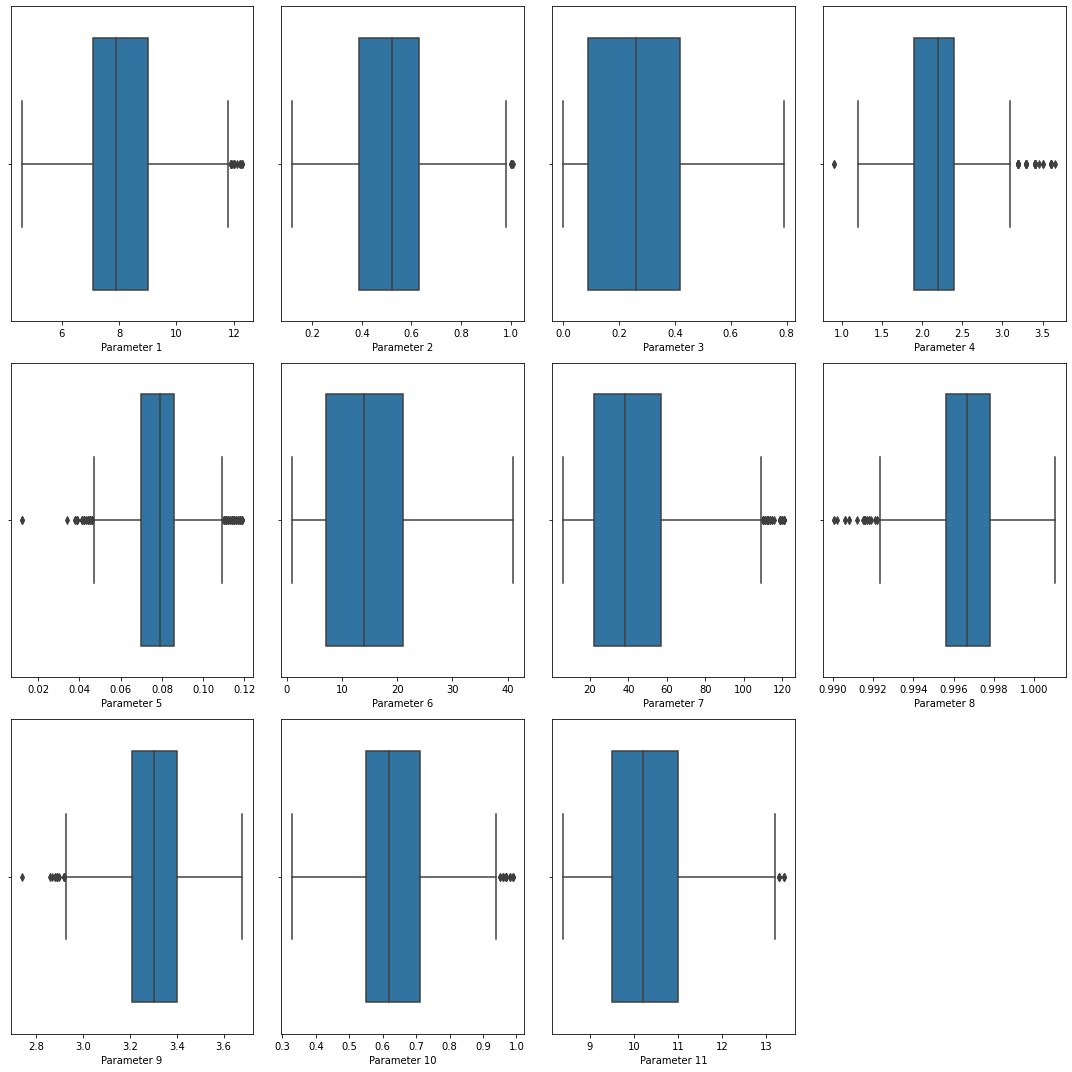

In [45]:
plt.figure(figsize = (15,15))
for i in range(0,11):
    plt.subplot(3,4,i+1)
    sns.boxplot(x = handle_X.columns[i],data = handle_X)
plt.tight_layout()
plt.show()

In [46]:
X_train,X_test,y_train,y_test  = train_test_split(MinMaxScaler().fit_transform(handle_X),y,test_size=0.2,stratify=y,random_state=1)

In [47]:
#Buildinhg Machine learing models
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()

# LR
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print("Linear regressiont train score = ",lr.score(X_train,y_train))

# lassso

lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
print("lasso train score = ",lasso.score(X_train,y_train))

#ridge

ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print("ridge train score = ",ridge.score(X_train,y_train))

#SVM

svr.fit(X_train,y_train)
svr_pred = svr.predict(X_test)
print("svr train score = ",svr.score(X_train,y_train))

# knn

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("knn train score = ",knn.score(X_train,y_train))

#rf

rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print("random forest train score = ",rf.score(X_train,y_train))

# gb
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)
print("graidentBoost train score = ",gb.score(X_train,y_train))

Linear regressiont train score =  0.3559496205333986
lasso train score =  0.0
ridge train score =  0.35582545499429274
svr train score =  0.5708220472442258
knn train score =  0.52421324451264
random forest train score =  0.9258180717988063
graidentBoost train score =  0.6173724573580797


In [48]:
# scores
print("Linear regressiont test score = ",mean_squared_error(y_test,lr_pred))
print("lasso test score = ",mean_squared_error(y_test,lasso_pred))
print("ridge test score = ",mean_squared_error(y_test,ridge_pred))
print("svr test score = ",mean_squared_error(y_test,svr_pred))
print("knn test score = ",mean_squared_error(y_test,knn_pred))
print("random forest test score = ",mean_squared_error(y_test,rf_pred))
print("graidentBoost test score = ",mean_squared_error(y_test,gb_pred))

Linear regressiont test score =  0.016767451709934843
lasso test score =  0.025812361500903835
ridge test score =  0.016752651493574404
svr test score =  0.014708934736546515
knn test score =  0.01653500000000001
random forest test score =  0.013166725000000008
graidentBoost test score =  0.016120593971516446


In [49]:
model_2 = Sequential([
    Dense(100,activation = 'relu'),
    Dense(50,activation = 'relu'),
    Dense(10,activation = 'relu'),
    Dense(1)
])

#2.compile
model_2.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.Adam(),metrics = ['mae'])

#model fitting
model_2.fit(X_train,y_train,epochs = 100)

Epoch 1/100
40/40 [==============================] - 1s 4ms/step - loss: 0.1797 - mae: 0.1797
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1062 - mae: 0.1062
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1020 - mae: 0.1020
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.1006 - mae: 0.1006
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0992 - mae: 0.0992
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0995 - mae: 0.0995
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0983 - mae: 0.0983
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0969 - mae: 0.0969
Epoch 9/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0977 - mae: 0.0977
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0961 - mae: 0.0961
Epoch 11/100
40/40 [==============================] - 0s 3m

In [50]:
#check the results 
model_2.evaluate(X_test,y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0942 - mae: 0.0942


[0.09421882033348083, 0.09421882033348083]

In [51]:
# hypertuing Using Keras tuner
hypermodel = ANNHyperModel()

tuner_h2 = kt.Hyperband(
    hypermodel,
    objective='mse',
    max_epochs=10,
    factor=3,
    #directory='keras_tuner_dir',
    project_name='keras_tuner_demo_h2'
)

tuner_h2.search(X_train, y_train, epochs=10)

Trial 30 Complete [00h 00m 02s]
mse: 0.019674809649586678

Best mse So Far: 0.016465649008750916
Total elapsed time: 00h 00m 48s
INFO:tensorflow:Oracle triggered exit


In [52]:
best_model_h2 = tuner_h2.get_best_models(num_models=1)[0]
loss, mse = best_model_h2.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0163 - mse: 0.0163


In [53]:
best_model_h2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 160)                 1920      
                                                                 
 dense_1 (Dense)             (32, 72)                  11592     
                                                                 
 dense_2 (Dense)             (32, 188)                 13724     
                                                                 
 dense_3 (Dense)             (32, 1)                   189       
                                                                 
Total params: 27,425
Trainable params: 27,425
Non-trainable params: 0
_________________________________________________________________


In [54]:
# random_search 
hypermodel =RegressionHyperModel()

tuner_rs2 = kt.RandomSearch(
            hypermodel,
            objective='mse',
            seed=42,
            max_trials=10,
            executions_per_trial=2,
            directory=os.path.normpath('D:/'),
            project_name='keras_tuner_demo__rs2')

tuner_rs2.search(X_train, y_train, epochs=10)

Trial 10 Complete [00h 00m 05s]
mse: 0.015621459111571312

Best mse So Far: 0.01510324701666832
Total elapsed time: 00h 01m 02s
INFO:tensorflow:Oracle triggered exit


In [55]:
best_model_rs2 = tuner_rs2.get_best_models(num_models=1)[0]
loss, mse = best_model_rs2.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.0159 - mse: 0.0159


In [56]:
best_model_rs2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 212)                 2544      
                                                                 
 dense_1 (Dense)             (32, 212)                 45156     
                                                                 
 dense_2 (Dense)             (32, 212)                 45156     
                                                                 
 dense_3 (Dense)             (32, 1)                   213       
                                                                 
Total params: 93,069
Trainable params: 93,069
Non-trainable params: 0
_________________________________________________________________


In [57]:
y_pred_rs2 = best_model_rs2.predict(X_test)
mean_squared_error(y_test,y_pred_rs2)

0.01590262432860443

# Conclusion 

* we have used various machine learning Modles and simple Ann and hypertuned Ann
* For Hypertunning we used two different methods hyperband and Random search
* we have tried the whole algorithms using data with outliers and data where outliers are handled
* When outliers are present then best model fromhyperband performs well
* when outliers are handled then best model from random search is performing better 
* Overall the best from hyperband is performing better with data where outliers are present 

In [53]:
# saving the better model for future use 

# 1. When there are outliers 
best_model_h1.save("best_model_with_outliers")

# 2. when there is no outliers 
best_model_rs2.save("best_model_without_outliers")

INFO:tensorflow:Assets written to: best_model_with_outliers/assets
INFO:tensorflow:Assets written to: best_model_without_outliers/assets


# ******************************* END PART 1 ********************************************

# Part - 2

<b>•DOMAIN: </b> Autonomous Vehicles

<b>•BUSINESS CONTEXT:</b> A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example  of  a  corpus  of  such  street-level  photographs  is  Google’s  Street  View  imagery  composed  of  hundreds  of  millions  of  geo-located  360-degree  panoramic images. The  ability  to  automatically  transcribe  an  address  number  from  a  geo-located  patch  of  pixels  and  associate  the  transcribed  number  with  a  known  street  address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colours, styles, orientations, and character arrangements. The  recognition  problem  is  further  complicated  by  environmental  factors  such  as  lighting,  shadows,  specularity,  and  occlusions  as  well  as  by  image  acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

<b>•DATA  DESCRIPTION:</b>  The  SVHN  is  a  real-world  image  dataset  for  developing  machine  learning  and  object  recognition  algorithms  with  the  minimal  requirement  on data  formatting  but  comes  from  a  significantly  harder,  unsolved,  real-world  problem  (recognising  digits  and  numbers  in  natural  scene  images).  SVHN  is  obtained from house numbers in Google Street View images.Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.The dataset has been provided in the form of h5py files.

<b>•PROJECT OBJECTIVE:</b> We will build a digit classifier on the SVHN (Street View Housing Number) dataset


In [58]:
# Getting the packages
import h5py
from keras.utils.np_utils import to_categorical
from keras.layers import BatchNormalization, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# getting the dataset
data1=h5py.File("/content/drive/MyDrive/Part - 4 - Autonomous_Vehicles_SVHN_single_grey1.h5",'r')


#Load the training, testing, and validation data
X_train=data1['X_train']
X_test=data1['X_test']
X_val=data1['X_val']
y_train=data1['y_train']
y_test=data1['y_test']
y_val=data1['y_val']

In [61]:
!pwd

/content


In [62]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [63]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X -- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X -- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X -- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y -- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y -- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y -- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X -- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X -- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X -- Shape : (60000, 32, 32) and Data Type :  float32
Training data y -- Shape : (42000,) and Data Type :  uint8
Testing data y -- Shape : (18000,) and Data Type :  uint8
Validation data y -- Shape : (60000,) and Data Type :  uint8


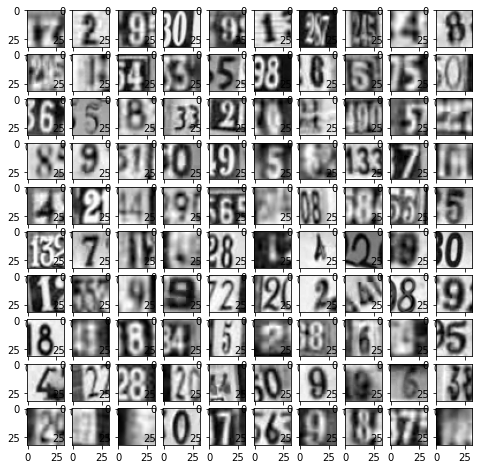

In [64]:
fig=plt.figure(figsize=(8,8))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

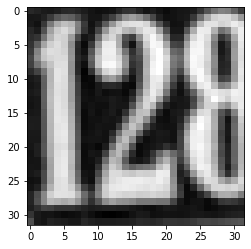

Label:  2


In [66]:
# show the number in the dataset
plt.imshow(X_train[0],cmap='gray')    
plt.show()
print('Label: ', y_train[0])

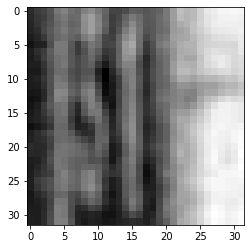

Label:  1


In [67]:
# show the number in the dataset
plt.imshow(X_test[0],cmap='gray')    
plt.show()
print('Label: ', y_test[0])

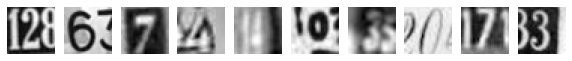

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [68]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [69]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

X_train=X_train/255
X_test=X_test/255
X_val= X_val/255

In [70]:
# Initializing the value of k and finding the accuracies on validation data
k_vals = range(1, 13, 2)
accuracies = []

for k in range(1, 13, 2):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_val, y_val)
    print("k value=%d, accuracy score=%.2f%%" % (k, score * 100))
    accuracies.append(score)

# finding the value of k which has the largest accuracy
i = int(np.argmax(accuracies))
print("k=%d value has highest accuracy of %.2f%% on validation data" % (k_vals[i],accuracies[i] * 100))


k value=1, accuracy score=83.78%
k value=3, accuracy score=62.83%
k value=5, accuracy score=62.42%
k value=7, accuracy score=61.42%
k value=9, accuracy score=60.59%
k value=11, accuracy score=60.32%
k=1 value has highest accuracy of 83.78% on validation data


In [71]:
# Retraining the model using the best k value and predict the labels on test data

knn = KNeighborsClassifier(n_neighbors=k_vals[i])
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [72]:
# show a final classification report demonstrating the accuracy of the classifier
print("EVALUATION ON TESTING DATA")
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
[[ 935   43   51   64   71   65  185   40  170  190]
 [  51 1034  109  122  123   69   68  119   67   66]
 [  63  135  872  131   82   74   65  168   79  134]
 [  67  166  127  610   88  229   82   80  149  121]
 [  85  195   51   71 1039   55  111   35   98   72]
 [  94  103   71  220   54  588  203   48  205  182]
 [ 225   74   51   72  102  154  711   33  295  115]
 [  65  173  146  100   34   38   48 1071   53   80]
 [ 150   62   59  130   86  153  267   44  675  186]
 [ 238   87   89  115   60  113  115   65  192  730]]
              precision    recall  f1-score   support

           0       0.47      0.52      0.49      1814
           1       0.50      0.57      0.53      1828
           2       0.54      0.48      0.51      1803
           3       0.37      0.35      0.36      1719
           4       0.60      0.57      0.59      1812
           5       0.38      0.33      0.36      1768
           6       0.38      0.39      0.39      1832
         

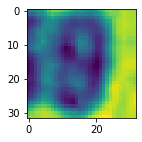

[9]


In [73]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[59].reshape(32,32))
plt.show()
image = X_test[15]
print(knn.predict(image.reshape(1, -1)))

# 5. Implementing Deep Neural Network

In [74]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

### Converting output label to multiple values

In [75]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [76]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [77]:
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)

In [78]:
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)


(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


In [79]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
y_val = y_val.astype('int')

In [80]:
X_train[0]/255

array([0.00050858, 0.00046536, 0.00041295, ..., 0.00076383, 0.00078205,
       0.00081565], dtype=float32)

In [81]:
np.isnan(X_train).sum()

0

In [82]:
np.isnan(y_train).sum()

0

In [83]:
np.isnan(X_val).sum()

0

In [84]:
np.isnan(y_val).sum()

0

### Implementing Neural Network

In [85]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

In [86]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512,activation='relu'))
#Adding Activation function
# kernel_initializer='he_normal'
#keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256,activation='relu'))
#Adding Activation function
#keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128,activation='relu'))
#Adding Activation function
#keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64,activation='relu'))
#Adding Activation function
#keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32,activation='relu'))
#Adding Activation function
#keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10,activation='softmax'))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
#keras_model.add(Activation('softmax'))

### Using sgd optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [87]:
# compiling the ANN classifier
keras_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer = optimizers.Adam(),metrics = ['accuracy'])

In [88]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train/255, y_train, validation_data=(X_val/255,y_val),batch_size = 128, epochs = 10, verbose = 1)


Epoch 1/10
329/329 [==============================] - 4s 10ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
329/329 [==============================] - 4s 13ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
329/329 [==============================] - 3s 10ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
329/329 [==============================] - 4s 13ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
329/329 [==============================] - 4s 13ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
329/329 [==============================] - 4s 13ms/step - loss: 2.3027 - accuracy: 0.1019 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
329/329 [==============================] - 3s 9ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000


In [89]:
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 699,690
Trainable params: 699,690
Non-tr

### Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [90]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [91]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 3s 12ms/step - loss: 2.2507 - accuracy: 0.1365 - val_loss: 2.0663 - val_accuracy: 0.2401
Epoch 2/10
210/210 [==============================] - 2s 11ms/step - loss: 1.7982 - accuracy: 0.3407 - val_loss: 1.5715 - val_accuracy: 0.4449
Epoch 3/10
210/210 [==============================] - 3s 14ms/step - loss: 1.4882 - accuracy: 0.4857 - val_loss: 1.3983 - val_accuracy: 0.5309
Epoch 4/10
210/210 [==============================] - 3s 16ms/step - loss: 1.2878 - accuracy: 0.5763 - val_loss: 1.1921 - val_accuracy: 0.6155
Epoch 5/10
210/210 [==============================] - 3s 13ms/step - loss: 1.1424 - accuracy: 0.6345 - val_loss: 1.0821 - val_accuracy: 0.6575
Epoch 6/10
210/210 [==============================] - 3s 16ms/step - loss: 1.0654 - accuracy: 0.6616 - val_loss: 1.0116 - val_accuracy: 0.6850
Epoch 7/10
210/210 [==============================] - 3s 14ms/step - loss: 1.0336 - accuracy: 0.6735 - val_loss: 0.9927 - val_accuracy: 0.6873

* The accuracy of the model on val data is very low either using adam or sgd.

#### Now, try to change the learning rate in SGD optimizer

As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.


In [92]:
#Setting the learning rate  and decay in sgd
sgd = optimizers.SGD(learning_rate = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)


Epoch 1/100
210/210 [==============================] - 3s 12ms/step - loss: 0.8272 - accuracy: 0.7420 - val_loss: 0.8293 - val_accuracy: 0.7428
Epoch 2/100
210/210 [==============================] - 2s 9ms/step - loss: 0.8141 - accuracy: 0.7466 - val_loss: 0.8250 - val_accuracy: 0.7446
Epoch 3/100
210/210 [==============================] - 2s 9ms/step - loss: 0.8109 - accuracy: 0.7472 - val_loss: 0.8229 - val_accuracy: 0.7458
Epoch 4/100
210/210 [==============================] - 2s 9ms/step - loss: 0.8090 - accuracy: 0.7483 - val_loss: 0.8214 - val_accuracy: 0.7459
Epoch 5/100
210/210 [==============================] - 2s 11ms/step - loss: 0.8077 - accuracy: 0.7490 - val_loss: 0.8203 - val_accuracy: 0.7462
Epoch 6/100
210/210 [==============================] - 2s 9ms/step - loss: 0.8065 - accuracy: 0.7492 - val_loss: 0.8195 - val_accuracy: 0.7461
Epoch 7/100
210/210 [==============================] - 2s 9ms/step - loss: 0.8058 - accuracy: 0.7489 - val_loss: 0.8188 - val_accuracy: 0.74

* The accuracy of the model on val data using sgd with learning rate=0.0001 is improving a bit but not much.

### Now, let's try to change the learning rate in ADAM optimizer

As, we are taking learning rate small means model will learn slowly. So, we have to take more number of epochs.

In [93]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(learning_rate = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 3s 13ms/step - loss: 0.7982 - accuracy: 0.7522 - val_loss: 0.7999 - val_accuracy: 0.7522
Epoch 2/100
210/210 [==============================] - 2s 11ms/step - loss: 0.7891 - accuracy: 0.7558 - val_loss: 0.7993 - val_accuracy: 0.7523
Epoch 3/100
210/210 [==============================] - 2s 11ms/step - loss: 0.7846 - accuracy: 0.7563 - val_loss: 0.7931 - val_accuracy: 0.7551
Epoch 4/100
210/210 [==============================] - 2s 11ms/step - loss: 0.7797 - accuracy: 0.7587 - val_loss: 0.7890 - val_accuracy: 0.7558
Epoch 5/100
210/210 [==============================] - 2s 11ms/step - loss: 0.7728 - accuracy: 0.7597 - val_loss: 0.7830 - val_accuracy: 0.7585
Epoch 6/100
210/210 [==============================] - 2s 10ms/step - loss: 0.7678 - accuracy: 0.7613 - val_loss: 0.7775 - val_accuracy: 0.7600
Epoch 7/100
210/210 [==============================] - 2s 12ms/step - loss: 0.7628 - accuracy: 0.7641 - val_loss: 0.7810 - val_accuracy:

* The accuracy of the model on val data using ADAM with learning rate=0.0001 has shown significant improvement.


In [94]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

1875/1875 [==============================] - 7s 3ms/step - loss: 0.5569 - accuracy: 0.8313
Val_acc using simple NN adam :  0.8313000202178955


In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.8313


#### Implementing batch normalization for training the neural network

In [96]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

### Adding Batch normalization layer

In [97]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [98]:
keras_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 256)              

### Using ADAM optimizer.

* learning rate= 0.0001

In [99]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(learning_rate = 0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [100]:
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)


Epoch 1/100
210/210 [==============================] - 5s 16ms/step - loss: 2.0952 - accuracy: 0.2660 - val_loss: 2.0480 - val_accuracy: 0.2981
Epoch 2/100
210/210 [==============================] - 3s 14ms/step - loss: 1.5532 - accuracy: 0.5215 - val_loss: 1.5619 - val_accuracy: 0.5263
Epoch 3/100
210/210 [==============================] - 3s 14ms/step - loss: 1.2684 - accuracy: 0.6414 - val_loss: 1.3287 - val_accuracy: 0.6105
Epoch 4/100
210/210 [==============================] - 3s 14ms/step - loss: 1.0817 - accuracy: 0.6971 - val_loss: 1.2046 - val_accuracy: 0.6461
Epoch 5/100
210/210 [==============================] - 3s 12ms/step - loss: 0.9479 - accuracy: 0.7335 - val_loss: 1.0199 - val_accuracy: 0.7077
Epoch 6/100
210/210 [==============================] - 3s 14ms/step - loss: 0.8464 - accuracy: 0.7605 - val_loss: 1.0016 - val_accuracy: 0.7132
Epoch 7/100
210/210 [==============================] - 2s 12ms/step - loss: 0.7647 - accuracy: 0.7818 - val_loss: 0.9833 - val_accuracy:

In [101]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 0.8959 - accuracy: 0.8187
Val_acc using Batch ANN adam :  0.8186666369438171


In [102]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.831300
2,NN_Batch_adam,0.818667


### Implementing (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions)

In [103]:
#Initialize the Artificial Neural Network Classifier
keras_model_2 = Sequential()

### Adding Batch normalization layer

In [104]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_2.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_2.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_2.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_2.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_2.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_2.add(BatchNormalization())
#Adding Activation function
keras_model_2.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_2.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_2.add(Activation('softmax'))

In [105]:
keras_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 256)              

### Using SGD optimizer

* learning rate =0.0001

In [106]:
#Setting the learning rate in sgd
sgd = optimizers.SGD(learning_rate = 0.0001)
# compiling the ANN classifier
keras_model_2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [107]:
# Fitting the ANN to the Training data
history_2 = keras_model_2.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 4s 15ms/step - loss: 2.5409 - accuracy: 0.1035 - val_loss: 2.4033 - val_accuracy: 0.1034
Epoch 2/10
210/210 [==============================] - 3s 13ms/step - loss: 2.5271 - accuracy: 0.1066 - val_loss: 2.4795 - val_accuracy: 0.1073
Epoch 3/10
210/210 [==============================] - 2s 11ms/step - loss: 2.5130 - accuracy: 0.1074 - val_loss: 2.5025 - val_accuracy: 0.1099
Epoch 4/10
210/210 [==============================] - 2s 11ms/step - loss: 2.4985 - accuracy: 0.1103 - val_loss: 2.4938 - val_accuracy: 0.1125
Epoch 5/10
210/210 [==============================] - 3s 13ms/step - loss: 2.4849 - accuracy: 0.1142 - val_loss: 2.4819 - val_accuracy: 0.1150
Epoch 6/10
210/210 [==============================] - 3s 13ms/step - loss: 2.4741 - accuracy: 0.1156 - val_loss: 2.4708 - val_accuracy: 0.1179
Epoch 7/10
210/210 [==============================] - 2s 11ms/step - loss: 2.4605 - accuracy: 0.1184 - val_loss: 2.4589 - val_accuracy: 0.1202

In [109]:
results_2 = keras_model_2.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_2[1])

1875/1875 [==============================] - 12s 6ms/step - loss: 2.4251 - accuracy: 0.1293
Val_acc using Batch ANN adam :  0.1292833387851715


In [110]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_sgd'], 'accuracy': [results_2[1]]},index={'3'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.831300
2,NN_Batch_adam,0.818667
3,NN_Batch_sgd,0.129283


* The batch normalization using SGD optimizer is giving better results than using adam optimizer.

### Implementing batch normalization and Dropout for training the neural network

In [111]:
##Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

### Adding BatchNormalization Layer and Dropout Layer (0.5)

In [112]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))
#Adding Dropout Layer
keras_model_3.add(Dropout(0.5))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [113]:
keras_model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_10 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_11 (Bat  (None, 256)              1024      
 chNormalization)                                     

### Using ADAM optimizer.

* learning rate= 0.0001

In [114]:
#Setting the learning rate in adam
adam = optimizers.Adam(learning_rate = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [115]:
# Fitting the ANN to the Training data
history_3 = keras_model_3.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 5s 15ms/step - loss: 2.8546 - accuracy: 0.0982 - val_loss: 2.3275 - val_accuracy: 0.1027
Epoch 2/100
210/210 [==============================] - 3s 13ms/step - loss: 2.7133 - accuracy: 0.1021 - val_loss: 2.3296 - val_accuracy: 0.1049
Epoch 3/100
210/210 [==============================] - 3s 14ms/step - loss: 2.6078 - accuracy: 0.1042 - val_loss: 2.3233 - val_accuracy: 0.1068
Epoch 4/100
210/210 [==============================] - 3s 12ms/step - loss: 2.5423 - accuracy: 0.1021 - val_loss: 2.3164 - val_accuracy: 0.1076
Epoch 5/100
210/210 [==============================] - 3s 14ms/step - loss: 2.4925 - accuracy: 0.1026 - val_loss: 2.3122 - val_accuracy: 0.1059
Epoch 6/100
210/210 [==============================] - 3s 14ms/step - loss: 2.4467 - accuracy: 0.1020 - val_loss: 2.3071 - val_accuracy: 0.1061
Epoch 7/100
210/210 [==============================] - 3s 13ms/step - loss: 2.4222 - accuracy: 0.1027 - val_loss: 2.3023 - val_accuracy:

In [116]:
results_3 = keras_model_3.evaluate(X_val, y_val)
print('Val_acc using BatchNorm and Dropout adam : ', results_3[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 0.9700 - accuracy: 0.7052
Val_acc using BatchNorm and Dropout adam :  0.7052333354949951


In [117]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_Drop_adam'], 'accuracy': [results_3[1]]},index={'4'})
results_on_val= pd.concat([results_on_val, tempResultsDf])
results_on_val = results_on_val[['Method', 'accuracy']]
results_on_val

,Method,accuracy
1,NN,0.831300
2,NN_Batch_adam,0.818667
3,NN_Batch_sgd,0.129283
4,NN_Batch_Drop_adam,0.705233


### Testing NN on test data

In [118]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [119]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_final.add(BatchNormalization())
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_final.add(Activation('softmax'))

In [120]:
keras_model_final.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_15 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_16 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 256)              

In [121]:
#Setting the learning rate in sgd
adam = optimizers.Adam(learning_rate = 0.0001)
# compiling the ANN classifier
keras_model_final.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [122]:
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)


Epoch 1/100
210/210 [==============================] - 4s 10ms/step - loss: 2.1181 - accuracy: 0.2396 - val_loss: 2.0814 - val_accuracy: 0.2542
Epoch 2/100
210/210 [==============================] - 2s 9ms/step - loss: 1.5900 - accuracy: 0.5101 - val_loss: 1.6359 - val_accuracy: 0.4955
Epoch 3/100
210/210 [==============================] - 2s 9ms/step - loss: 1.2936 - accuracy: 0.6366 - val_loss: 1.3779 - val_accuracy: 0.5762
Epoch 4/100
210/210 [==============================] - 2s 9ms/step - loss: 1.0982 - accuracy: 0.6981 - val_loss: 1.2484 - val_accuracy: 0.6315
Epoch 5/100
210/210 [==============================] - 2s 9ms/step - loss: 0.9616 - accuracy: 0.7314 - val_loss: 1.1837 - val_accuracy: 0.6542
Epoch 6/100
210/210 [==============================] - 2s 9ms/step - loss: 0.8565 - accuracy: 0.7583 - val_loss: 1.1261 - val_accuracy: 0.6650
Epoch 7/100
210/210 [==============================] - 2s 9ms/step - loss: 0.7730 - accuracy: 0.7798 - val_loss: 1.0619 - val_accuracy: 0.665

In [123]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

563/563 [==============================] - 3s 5ms/step - loss: 1.4676 - accuracy: 0.7302
Test accuracy :  0.730222225189209


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


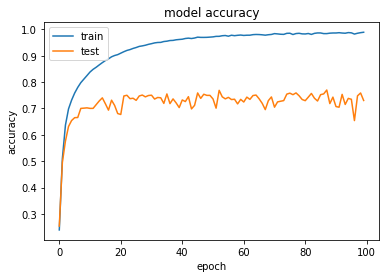

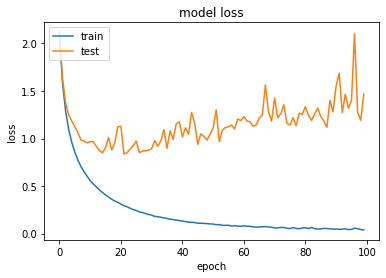

In [130]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting the digits using NN classifier on test data

Image 1

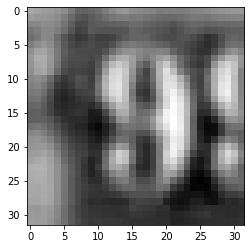

In [124]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [125]:
#Predicting the digits
#keras_model_final.predict_classes(X_test)[5]
#predict_x=model.predict(X_test) 
classes_x=np.argmax(keras_model_final.predict(X_test)[5])#,axis=1)
classes_x

9

Image 2

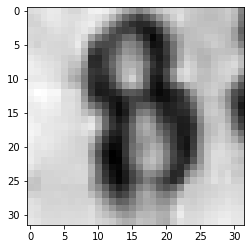

In [126]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray')

Image 3

In [127]:
#Predicting the digits
#keras_model_final.predict_classes(X_test)[112]
classes_x=np.argmax(keras_model_final.predict(X_test)[112])#,axis=1)
classes_x

9

In [128]:
#Predicting for all images
y_pred= np.argmax(keras_model_final.predict(X_test),axis=1)
#keras_model_final.predict_classes(X_test)
print(y_pred)

[5 2 2 ... 7 9 2]


## Differences and trade-offs between traditional KNN and NN classifiers with the help of classification metrics

* KNN requires more time to find the nearest neibhours. It takes less time to train the model. It took more than 24hrs to find the best neighbour(k). However, Neural Network takes more time to train the model.
* In KNN, we have only one hyperparameter k while in NN we have so many hyperparameters(Hidden Layers, Hidden Units,learning Rate, Number of Epochs, activations Functions).
* KNN classification metrics shows that the accuracy is 46%. The digit 4 and 6 are classified correctly and achieved approx 60% accuracy. the other digits are not predicted correclty.
* Using NN with batchNormalization we got 83.7% accuracy. We have predicted the classification of the images correctly.
* used various methods in NN for ggetting better accuracy
* facing memry outof bound error so used some samples so it is not upto mark models

In [129]:
results_on_val

,Method,accuracy
1,NN,0.831300
2,NN_Batch_adam,0.818667
3,NN_Batch_sgd,0.129283
4,NN_Batch_Drop_adam,0.705233
